## **Objective:**

#### Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.
#### They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

**How can you help here?**

Your analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Dataset:**

**Dataset Link: jamboree_admission.csv**

**Column Profiling:**

* Serial No. (Unique row ID)
* GRE Scores (out of 340)
* TOEFL Scores (out of 120)
* University Rating (out of 5)
* Statement of Purpose and Letter of Recommendation Strength (out of 5)
* Undergraduate GPA (out of 10)
* Research Experience (either 0 or 1)
* Chance of Admit (ranging from 0 to 1)

### Importing Libraries

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# Library to split data
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import Ridge, Lasso

### **Import Dataset & Exploratory Data Analysis**

In [2]:
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


### Droping the unique row Identifier - Serial No.

In [4]:
df.drop(['Serial No.'],axis=1,inplace=True)

In [5]:
df.shape

(500, 8)

* 500 rows and 9 columns are there

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


### Use Non-graphical and graphical analysis for getting inferences about variables.

In [7]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


## **Observations Based on Descriptive Statistics**

---

### **1. GRE Score:**

* **Mean:** 316.47, **Std Dev:** 11.30
* **Min–Max:** 290 – 340
* **Observation:** Most students score above 310; the distribution is slightly left-skewed (more high scorers).

---

### **2. TOEFL Score:**

* **Mean:** 107.19, **Std Dev:** 6.08
* **Min–Max:** 92 – 120
* **Observation:** Very high English proficiency among students.

---

### **3. University Rating:**

* **Mean:** 3.11, **Std Dev:** 1.14
* **IQR:** 2 to 4
* **Observation:** Most universities are mid-ranked (2 to 4). There’s a relatively balanced representation across tiers.

---

### **4. SOP Strength:**

* **Mean:** 3.37, **Std Dev:** 0.99
* **Range:** 1 – 5
* **Observation:** SOPs are generally strong, skewed toward the higher end (50% students have SOP ≥ 3.5). 

---

### **5. LOR Strength:**

* **Mean:** 3.48, **Std Dev:** 0.93
* **Range:** 1 – 5
* **Observation:** Similar pattern to SOP, with generally strong recommendations. 

---

### **6. CGPA (out of 10)**

* **Mean:** 8.58, **Std Dev:** 0.60
* **Range:** 6.8 – 9.92
* 
* **Observation:** Most applicants have a high GPA, centered tightly around 8.5, indicating strong academic profiles.

---

### **7. Research Experience (Binary: 0 or 1)**

* **Mean:** 0.56
* **Observation:** About **56% of students have research experience**. 

---

### **8. Chance of Admit (Probability: 0 to 1)**

* **Mean:** 0.72, **Std Dev:** 0.14
* **Range:** 0.34 – 0.97
* **Observation:** Most applicants have a moderate-to-high chance of admission.

---

## Implications for Modeling:

* GRE, TOEFL, and GPA are **normally distributed with high means**, suggesting that applicants are mostly high performers.
* SOP, LOR, and University Rating have **lower variance**, and may need to be tested for **multicollinearity**.
* Research is binary and can provide a clear signal for admissions.
* Chance of Admit has a **slight right skew**, but is continuous, so Linear Regression is appropriate.

In [8]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

* No null or missing values in the dataset.

In [9]:
df.tail()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73
499,327,113,4,4.5,4.5,9.04,0,0.84


In [10]:
df.skew() #skewness of each variable

GRE Score           -0.039842
TOEFL Score          0.095601
University Rating    0.090295
SOP                 -0.228972
LOR                 -0.145290
CGPA                -0.026613
Research            -0.242475
Chance of Admit     -0.289966
dtype: float64

- **GRE Score**        (-0.0398): Nearly symmetric, very slight left skew                    
- **TOEFL Score**      (+0.0956): Nearly symmetric, very slight right skew                   
- **University Rating**(+0.0903): Slight right skew, close to symmetric                          
- **SOP**              (-0.2290): Mild left skew, many students rate SOP high                
- **LOR**              (-0.1453): Slight left skew                                               
- **CGPA**             (-0.0266): Nearly symmetric                                               
- **Research**         (-0.2425): Categorial variable; skewness not informative here                 
- **Chance of Admit**  (-0.2900): Moderate left skew, more students have higher admit chances

In [11]:
df.kurt()

GRE Score           -0.711064
TOEFL Score         -0.653245
University Rating   -0.810080
SOP                 -0.705717
LOR                 -0.745749
CGPA                -0.561278
Research            -1.949018
Chance of Admit     -0.454682
dtype: float64

- All variables show negative kurtosis, meaning their distributions are flatter and have fewer outliers than a normal distribution.
- No transformation needed before regression.

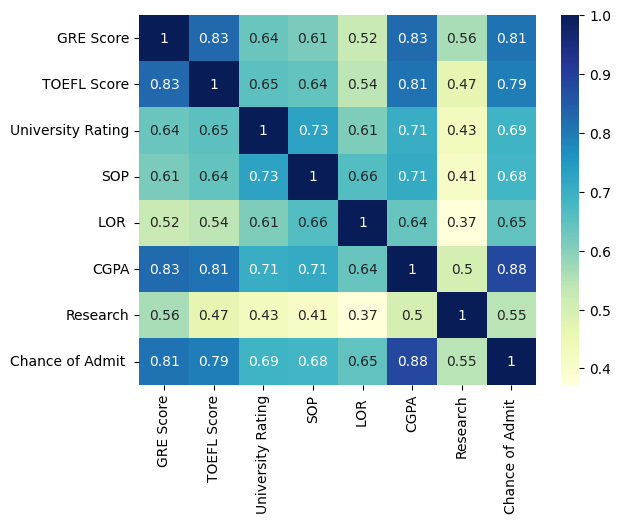

In [12]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [13]:
df.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


- CGPA, GRE, and TOEFL are the top 3 contributors to admission chances.
- Research adds moderate but significant impact.
- Several variables are highly intercorrelated, so multicollinearity checks (VIF) are needed before modeling.

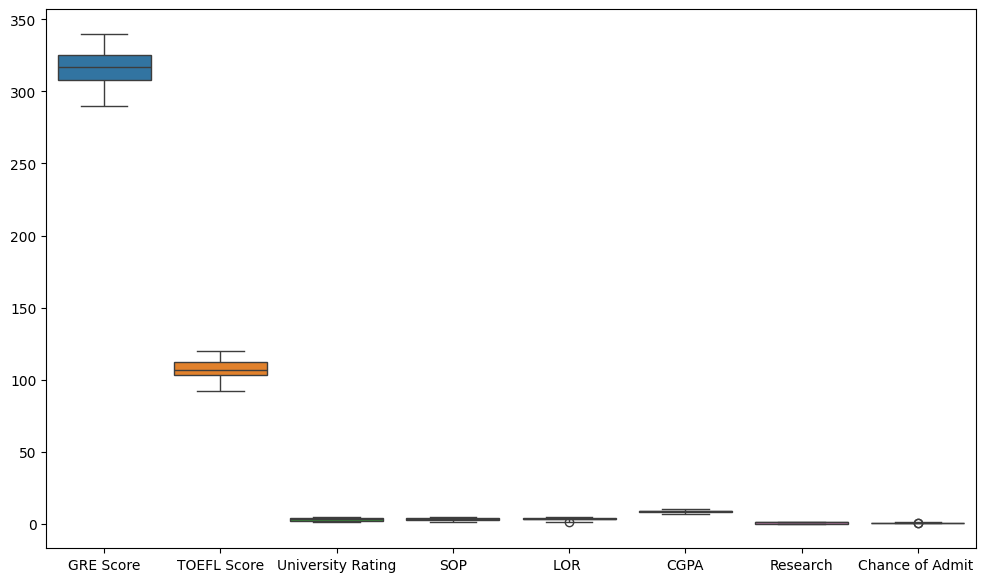

In [14]:
plt.figure(figsize=(12,7))
sns.boxplot(data=df)

plt.show()

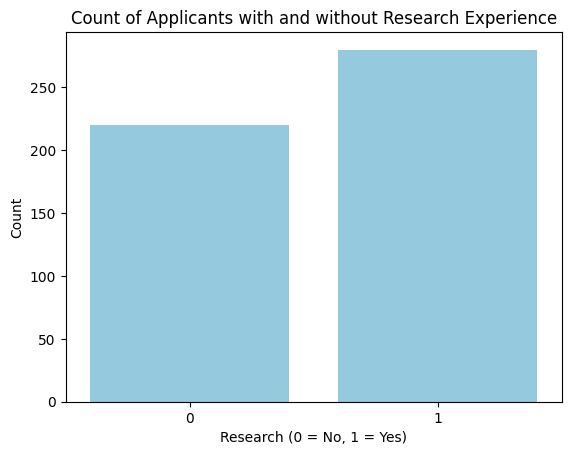

In [15]:
sns.countplot(x='Research', data=df, color='skyblue')
plt.title("Count of Applicants with and without Research Experience")
plt.xlabel("Research (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

- Students with reasearch experience are more.

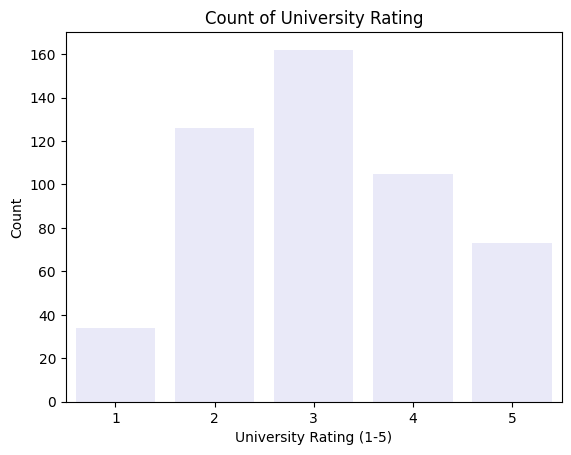

In [16]:
sns.countplot(x='University Rating', data=df, color='lavender')
plt.title("Count of University Rating")
plt.xlabel("University Rating (1-5)")
plt.ylabel("Count")
plt.show()

- Rating with 3 has the highest count.

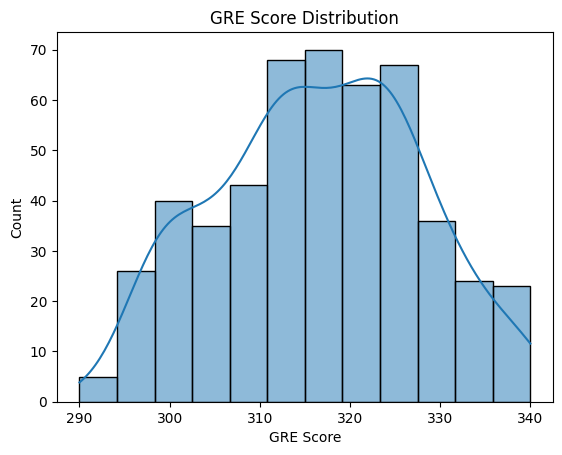

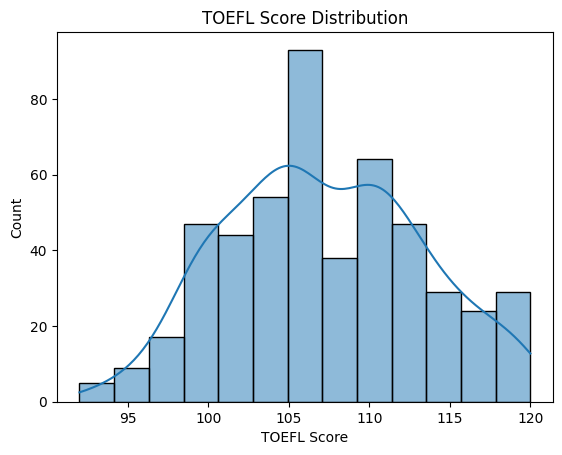

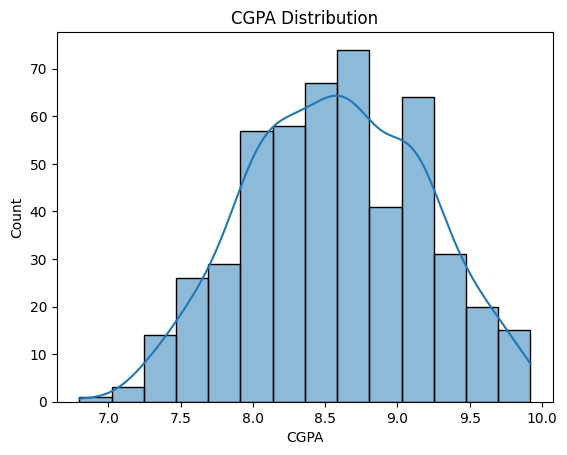

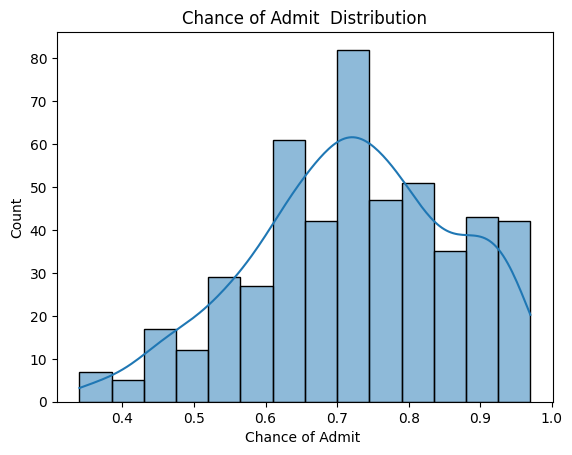

In [17]:
num_col = ['GRE Score', 'TOEFL Score', 'CGPA','Chance of Admit ']
for col in num_col:      
    sns.histplot(df[col],kde = True)
    plt.title(f'{col} Distribution')    
    plt.show()

- GRE scores are between 290 and 340, with maximum students scoring in the range 310-330.
- TOEFL scores are between 90 and 120, with maximum students scoring around 105.
- CGPA ranges between 7 and 10, with maximum students scoring around 8.5.
- Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%.

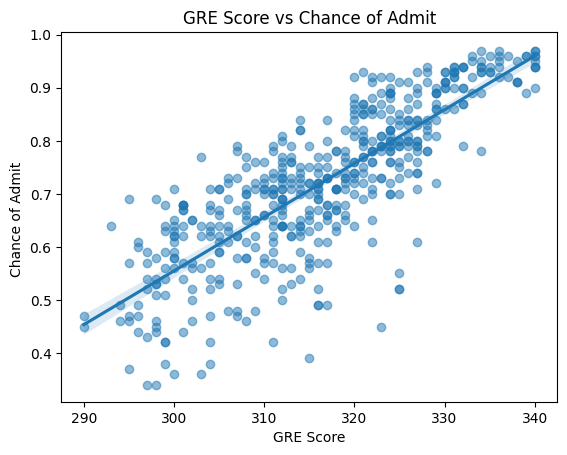

In [18]:
sns.regplot(x='GRE Score', y='Chance of Admit ', data=df, scatter_kws={'alpha':0.5})
plt.title("GRE Score vs Chance of Admit")
plt.show()

- Strong upward trend — higher GRE scores are associated with higher admission chances.

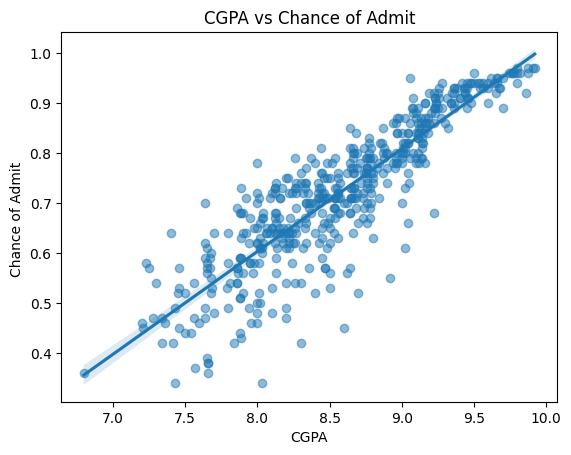

In [19]:
sns.regplot(x='CGPA', y='Chance of Admit ', data=df, scatter_kws={'alpha':0.5})
plt.title("CGPA vs Chance of Admit")
plt.show()

- Upward trend

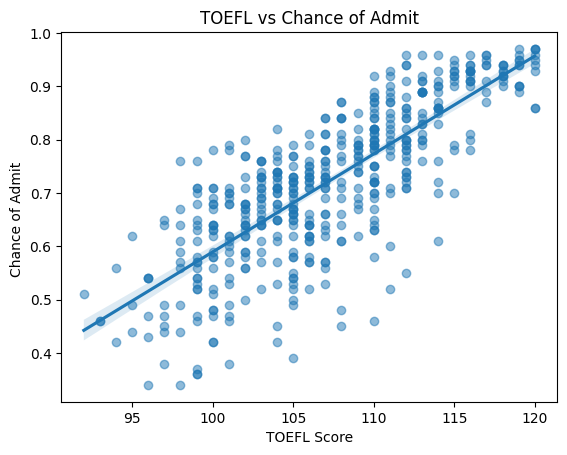

In [20]:
sns.regplot(x='TOEFL Score', y='Chance of Admit ', data=df, scatter_kws={'alpha':0.5})
plt.title("TOEFL vs Chance of Admit")
plt.show()

- Linear upward trend

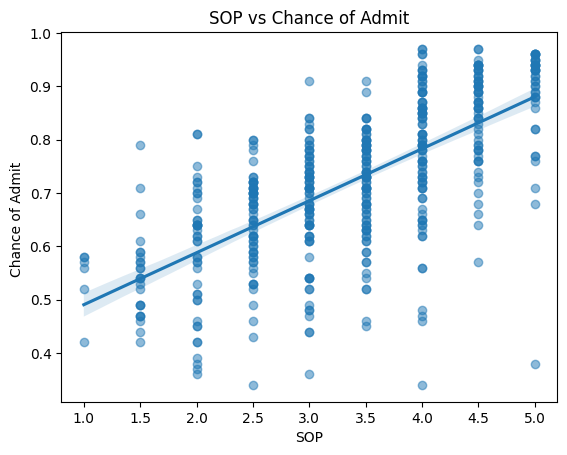

In [21]:
#SOP/LOR vs Admit
sns.regplot(x='SOP', y='Chance of Admit ', data=df, scatter_kws={'alpha':0.5})
plt.title("SOP vs Chance of Admit")
plt.show()

- Moderate linear trend

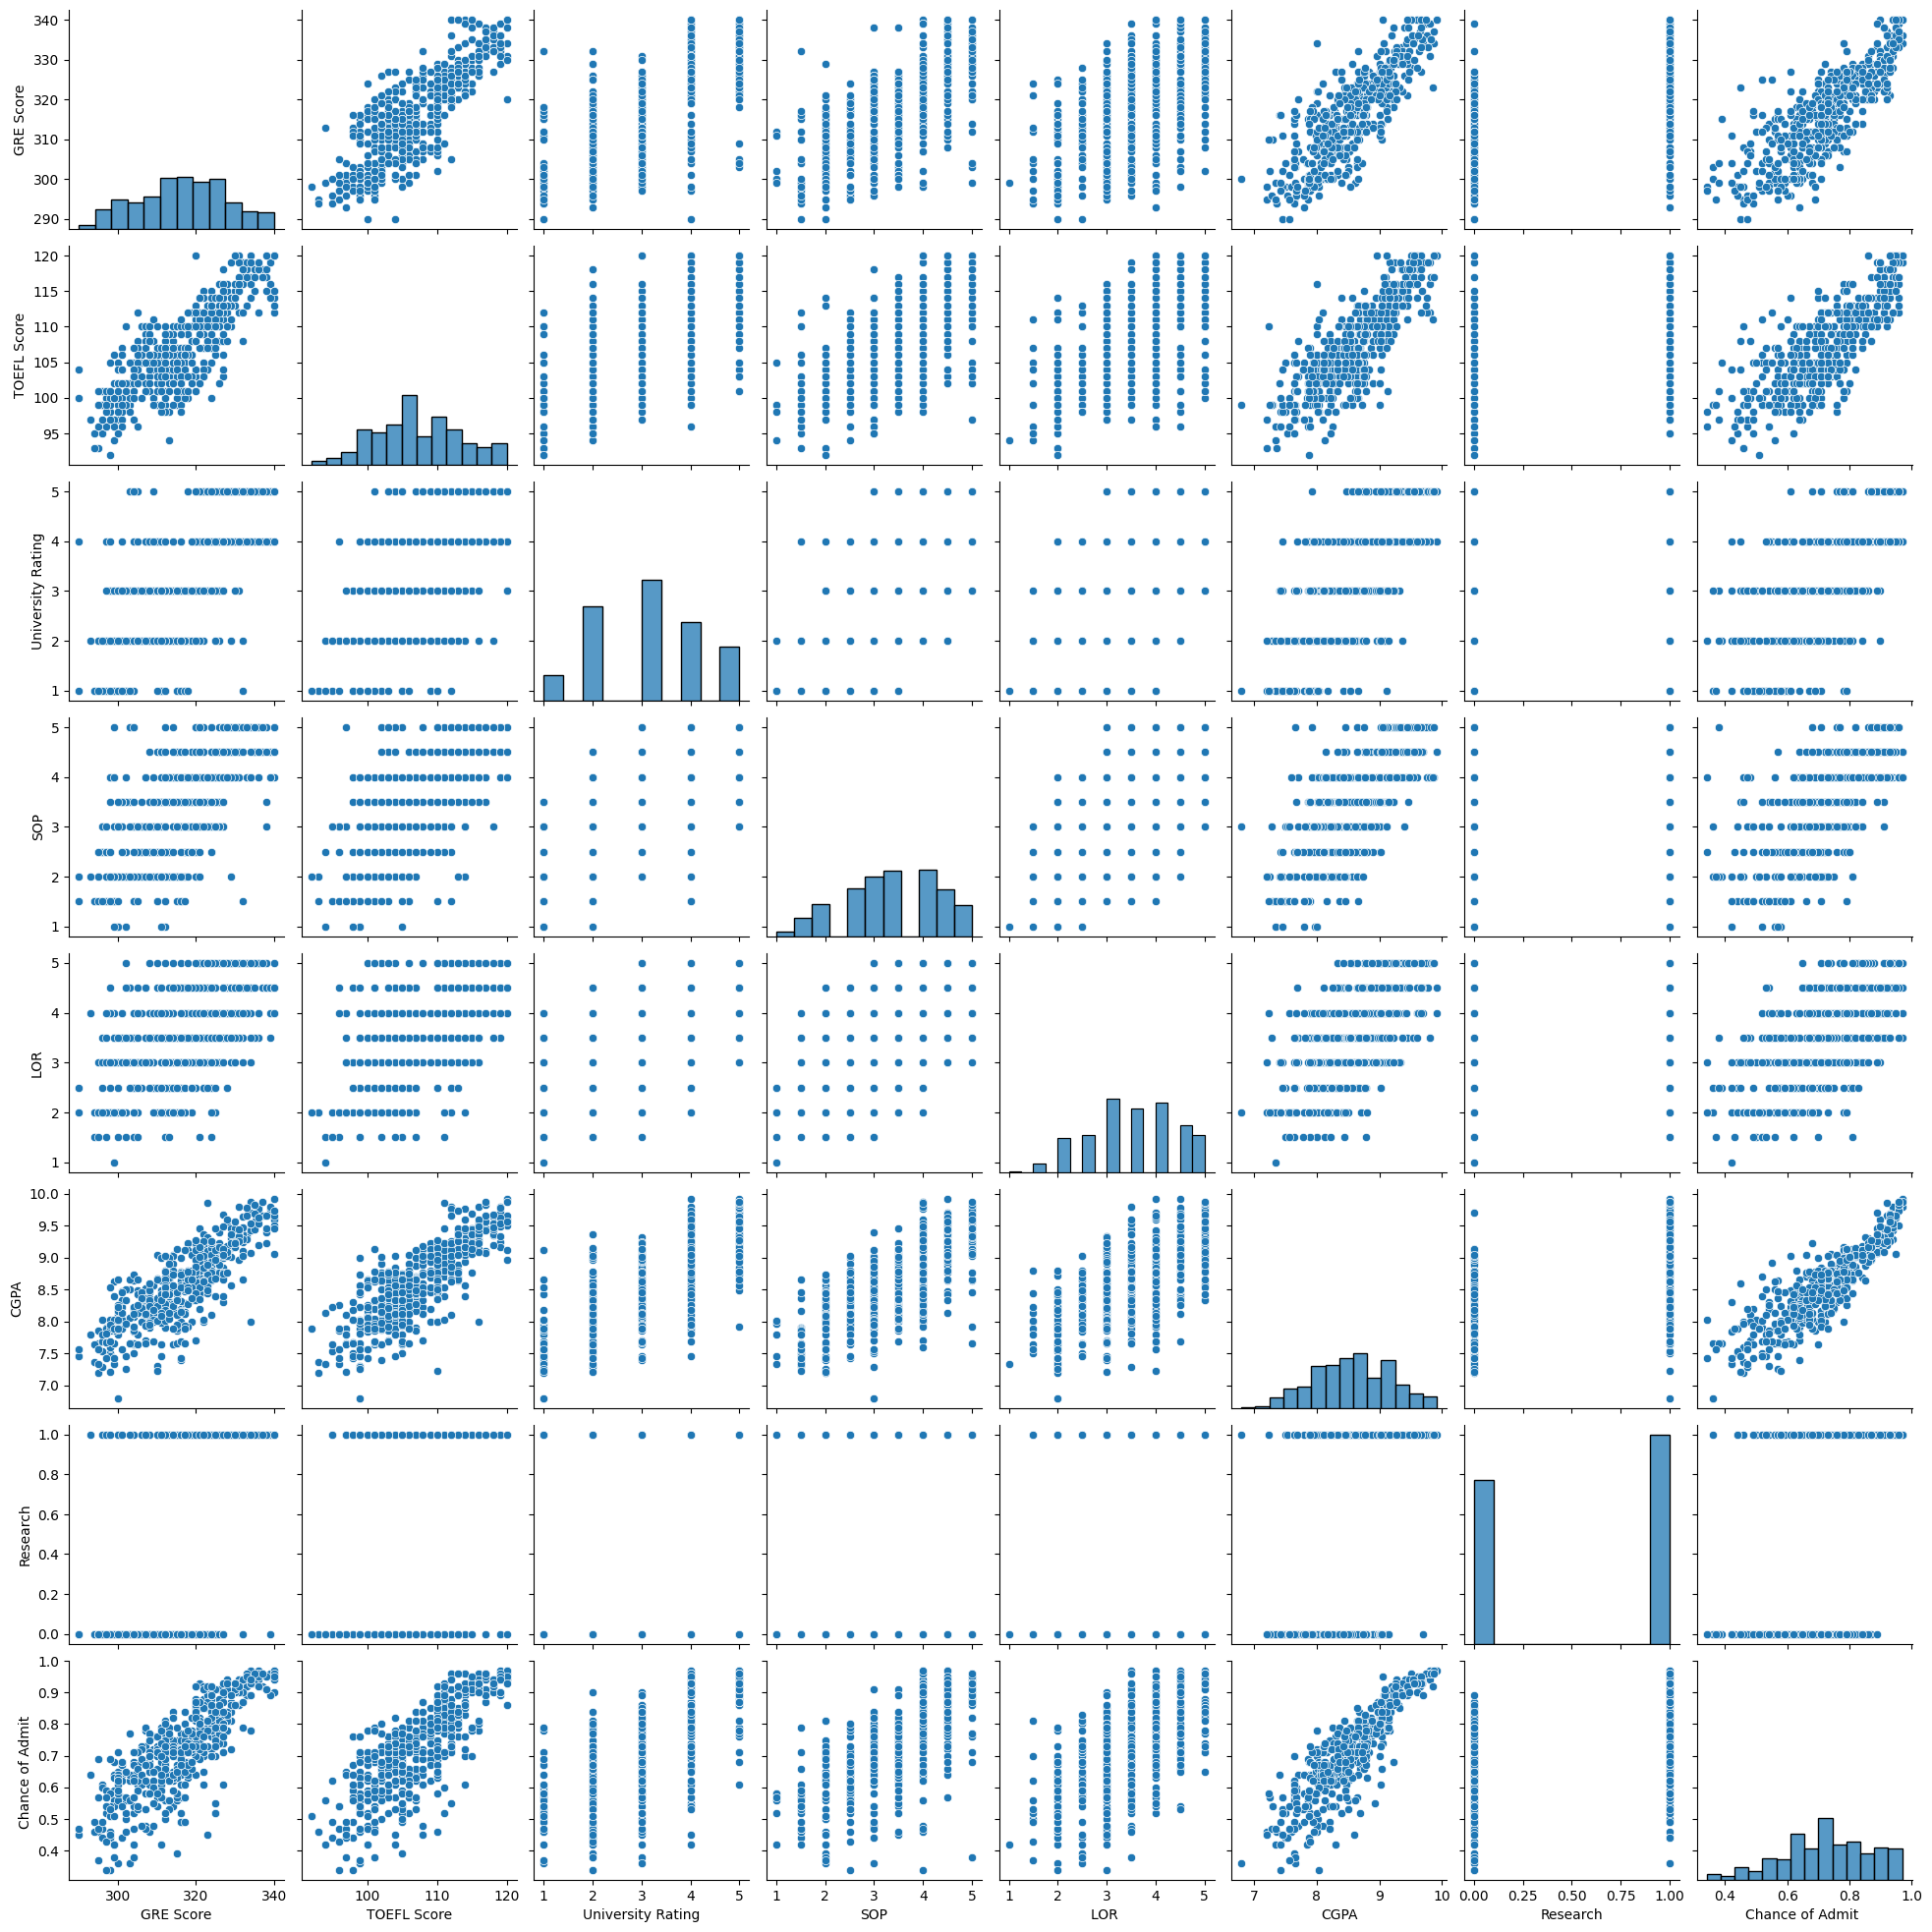

In [22]:
sns.pairplot(df)
plt.show()

- We can see from the scatterplot that the values of *university ranking, SOP, LOR and research* are not **continuous**. We can convert these columns to categorical variables

While they are stored as numerical values, their nature is categorical or ordinal:
- They represent levels or categories, not continuous measurements.
- The distances between levels may not be linear or meaningful for regression.



In [23]:
print(df.columns)

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')


In [24]:
df['University Rating'] = df['University Rating'].astype('category')
df['SOP'] = df['SOP'].astype('category')
df['LOR '] = df['LOR '].astype('category')
df['Research'] = df['Research'].astype('category')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   GRE Score          500 non-null    int64   
 1   TOEFL Score        500 non-null    int64   
 2   University Rating  500 non-null    category
 3   SOP                500 non-null    category
 4   LOR                500 non-null    category
 5   CGPA               500 non-null    float64 
 6   Research           500 non-null    category
 7   Chance of Admit    500 non-null    float64 
dtypes: category(4), float64(2), int64(2)
memory usage: 18.8 KB


In [26]:
df.describe(include="category")

,University Rating,SOP,LOR,Research
count,500,500.0,500.0,500
unique,5,9.0,9.0,2
top,3,4.0,3.0,1
freq,162,89.0,99.0,280


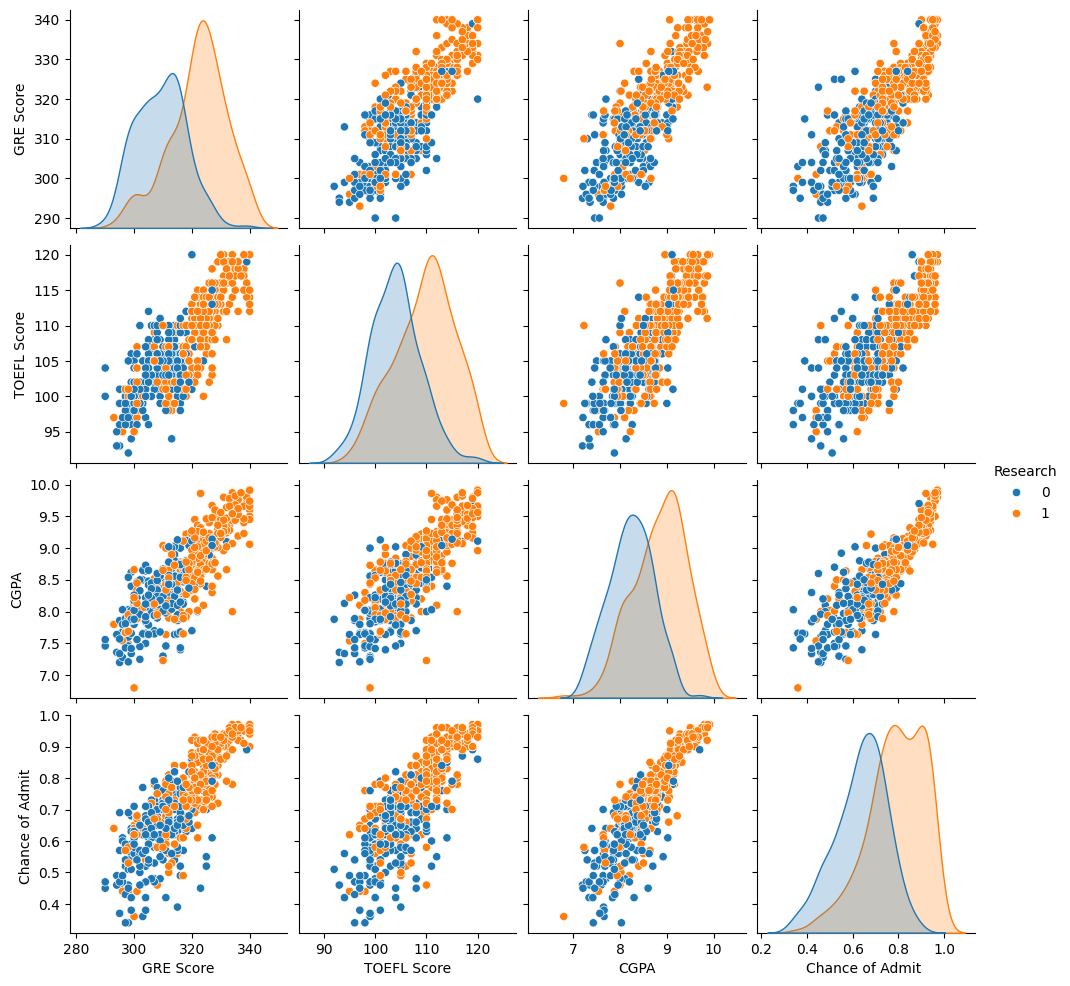

In [27]:
sns.pairplot(df, vars=['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit '], hue='Research')
plt.show()

### **Data Preprocessing**

In [28]:
# Check for duplicates
df.duplicated().sum()

0

- No duplicates present in the dataset.

In [29]:
df.isnull().sum() #no missing value found before

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

- No missing values.

In [30]:
numeric_cols = ['GRE Score', 'TOEFL Score', 'CGPA']

# Loop to detect outliers using IQR method
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    
    print(f"{col}: {len(outliers)} outliers")

GRE Score: 0 outliers
TOEFL Score: 0 outliers
CGPA: 0 outliers


- We do not need outlier treatment.

#### VIF analysis for multicollinearity

In [31]:
# Select only numeric predictors (exclude target variable)
X_vif = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]

# Add constant for intercept
X_vif_const = add_constant(X_vif)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

print(vif_data)

             Feature          VIF
0              const  1511.495830
1          GRE Score     4.464249
2        TOEFL Score     3.904213
3  University Rating     2.621036
4                SOP     2.835210
5               LOR      2.033555
6               CGPA     4.777992
7           Research     1.494008


- All VIFs are below the critical threshold of 5, so, no strong multicollinearity is present

### Feature Engineering

Feature Engineering is the process of extracting and organizing the important features from raw data in such a way that it fits the purpose of the machine learning model. It can be thought of as the art of selecting the important features and transforming them into refined and meaningful features that suit the needs of the model. **In this dataset it is not required.**

Feature Scaling – The last step of Feature Engineering Feature Scaling is the process of scaling or converting all the values in our dataset to a given scale. Some machine learning algorithms like linear regression, logistic regression, etc use gradient descent optimization. Such algorithms require the data to be scaled in order to perform optimally. K Nearest Neighbours, Support Vector Machine, and K-Means clustering also show a drastic rise in performance on scaling the data.

There are two main techniques of feature scaling:

1. **Standardization** - Standardization is the process of scaling the data values in such a way that that they gain the properties of standard normal distribution. This means that the data is rescaled in such a way that the mean becomes zero and the data has unit standard deviation.
2. **Normalization** - Normalization is the process of scaling the data values in such a way that that the value of all the features lies between 0 and 1.

In [32]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [33]:
scaler = MinMaxScaler()
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,0.94,0.928571,0.75,0.875,0.875,0.913462,1.0,0.920635
1,0.68,0.535714,0.75,0.750,0.875,0.663462,1.0,0.666667
2,0.52,0.428571,0.50,0.500,0.625,0.384615,1.0,0.603175
3,0.64,0.642857,0.50,0.625,0.375,0.599359,1.0,0.730159
4,0.48,0.392857,0.25,0.250,0.500,0.451923,0.0,0.492063


### Data preparation for modeling

In [34]:
X = df.drop('Chance of Admit ', axis=1)  # Drop target column for features
y = df['Chance of Admit '] # Target column

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [36]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)

Shape of Training set :  (350, 7)
Shape of test set :  (150, 7)


In [37]:
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)
# Fit model
model = sm.OLS(y_train, X_train).fit()

In [38]:
# For statsmodels OLS
y_train_pred = model.predict(sm.add_constant(X_train))
y_test_pred = model.predict(sm.add_constant(X_test))

In [39]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Chance of Admit    R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     219.8
Date:                Mon, 09 Jun 2025   Prob (F-statistic):          1.80e-122
Time:                        19:42:01   Log-Likelihood:                 329.46
No. Observations:                 350   AIC:                            -642.9
Df Residuals:                     342   BIC:                            -612.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0113      0.01

- **R-squared**          (0.818)- The model explains **81.8%** of the variance in `Chance of Admit`.
- **Adjusted R-squared** (0.814)- Adjusted for number of predictors - still high.
- **F-statistic**        (219.8)- Model is statistically significant overall.
- **Prob(F-statistic)**  (\~0  )- Strong evidence that predictors together improve the model.

In [40]:
# Create a DataFrame with all model coefficients and p-values
coefs_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.params.values,
    'p-value': model.pvalues.values
    
})

print(coefs_df)


             Feature  Coefficient       p-value
0              const     0.011334  5.225260e-01
1          GRE Score     0.177005  4.192407e-04
2        TOEFL Score     0.152346  6.319661e-04
3  University Rating     0.019651  4.976207e-01
4                SOP     0.009619  7.829661e-01
5               LOR      0.096634  2.237579e-03
6               CGPA     0.573403  2.271450e-20
7           Research     0.032936  9.602631e-03


**Coefficient Table:**

- **GRE Score**         - Significant — higher GRE → higher admit chance                     
- **TOEFL Score**       - Significant — TOEFL adds predictive power                          
- **University Rating** - Not significant — possibly due to high correlation with other vars     
- **SOP**               - Not significant — doesn’t add predictive power when others are present 
- **LOR**               - Significant — better LOR → better admission probability            
- **CGPA**              - Most Significant predictor — strong positive effect             
- **Research**          - Significant — students with research have \~3.3% higher chance     

In [41]:
def model_scores(X, y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    adjusted_r2 = 1 - (1 - r2) * (len(y_true) - 1) / (len(y_true) - X.shape[1] - 1)

    print(f"Root Mean Squared Error: {rmse:.3f}")
    print(f"R-squared: {r2:.3f}")
    print(f"Adjusted R-squared: {adjusted_r2:.3f}")

In [42]:
def model_evaluation(model, X_train, y_train, X_test, y_test):
    print("Training Set Evaluation:")
    y_train_pred = model.predict(X_train)
    model_scores(X_train, y_train, y_train_pred)
    print("\nTest Set Evaluation:")
    y_test_pred = model.predict(X_test)
    model_scores(X_test, y_test, y_test_pred)

    return y_train_pred, y_test_pred

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_pred_lr = lr_model.predict(X_test)

In [44]:
y_train_pred, y_pred_lr = model_evaluation(lr_model, X_train, y_train, X_test, y_test)

Training Set Evaluation:
Root Mean Squared Error: 0.094
R-squared: 0.818
Adjusted R-squared: 0.814

Test Set Evaluation:
Root Mean Squared Error: 0.096
R-squared: 0.826
Adjusted R-squared: 0.816


In [45]:
print(f"Coefficients: {model.params.values}")
print(f"Intercept: {lr_model.intercept_}")

Coefficients: [0.01133415 0.17700453 0.15234631 0.01965126 0.00961943 0.09663449
 0.57340344 0.03293574]
Intercept: 0.011334151729844866


- **RMSE:** Very low error on both
- **R-squared:** Model explains \~82% of the variance in both sets — very strong
- **Adjusted R-squared:** stable across both sets

The linear regression model demonstrates strong predictive power with an R-squared of \~82% on both the training and test sets

### Ridge and Lasso regression

Ridge and Lasso regression are both regularization techniques used to preventoverfitting in linear regression models. They work by adding a penalty term to the costfunction, which helps to control the complexity of the model by shrinking the coefficientvalues

In [46]:
# Scale features if not already done
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

# Lasso Regression
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Metrics
print("Ridge R2 Score:", r2_score(y_test, y_pred_ridge))
print("Lasso R2 Score:", r2_score(y_test, y_pred_lasso))

# Coefficients
ridge_coefs = pd.Series(ridge.coef_, index=X_train.columns)
lasso_coefs = pd.Series(lasso.coef_, index=X_train.columns)

print("\nRidge Coefficients:\n", ridge_coefs)
print("\nLasso Coefficients:\n", lasso_coefs)


Ridge R2 Score: 0.825666448760966
Lasso R2 Score: 0.8221400280335078

Ridge Coefficients:
 const                0.000000
GRE Score            0.038993
TOEFL Score          0.033084
University Rating    0.005870
SOP                  0.002698
LOR                  0.022248
CGPA                 0.108092
Research             0.016348
dtype: float64

Lasso Coefficients:
 const                0.000000
GRE Score            0.038128
TOEFL Score          0.029568
University Rating    0.003905
SOP                  0.000375
LOR                  0.017442
CGPA                 0.110772
Research             0.010542
dtype: float64


- Both models perform similarly and explain ~82–83% of the variance in the target variable.
- This suggests SOP may not be a strong predictor in this dataset.
- Ridge is preferable when all features are somewhat useful, as it retains all predictors.
- Lasso is better if you want simpler models or want to identify the most impactful features.

In this case, since CGPA, GRE, and TOEFL consistently dominate in both models, they are clearly the key predictors of the target(`Chance of Admit`).



## Testing the assumptions of the linear regression model

### Multicollinearity check by VIF score

In [47]:
# Select only numeric predictors (exclude target variable)
X_vif = df[['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA', 'Research']]

# Add constant for intercept
X_vif_const = add_constant(X_train)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = X_vif_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_vif_const.values, i) for i in range(X_vif_const.shape[1])]

print(vif_data)

             Feature        VIF
0              const  12.033329
1          GRE Score   4.526831
2        TOEFL Score   3.497877
3  University Rating   2.679544
4                SOP   2.908001
5               LOR    1.989814
6               CGPA   4.699733
7           Research   1.510207


- All VIFs are below the critical threshold of 5, so, no strong multicollinearity is present

### Residual Analysis

In [48]:
residuals = y_test - y_test_pred

# Calculate mean of residuals
mean_residual = np.mean(residuals)

print("Mean of residuals:", mean_residual)

Mean of residuals: -0.0093275963726144


- Since -0.0093 is nearly zero, this bias is negligible, and model is unbiased.

### Test for Homoscedasticity and Linearity of variables

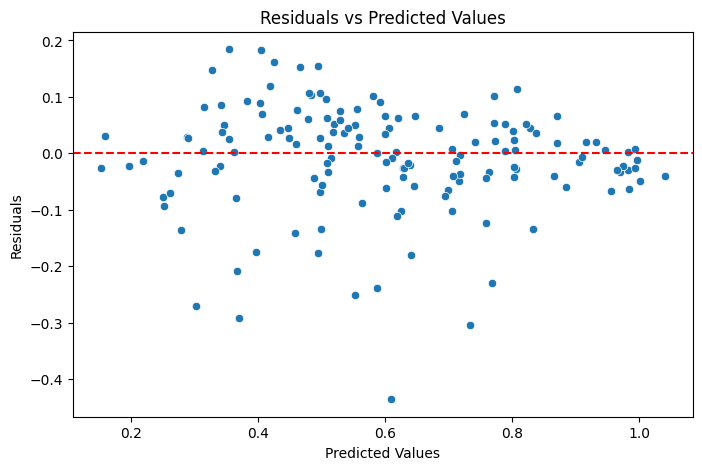

In [49]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()

- The residuals are randomly scattered around the red horizontal line at 0, with no clear pattern.
- There is no systematic curve, funnel shape, or trend, which indicates that the linearity assumption holds.
- The residuals show a roughly constant spread across predicted values, suggesting no severe heteroscedasticity.

Residual plot supports the linearity assumption of linear regression. The model appears to have captured the linear relationship well, with no major issues in residual distribution.

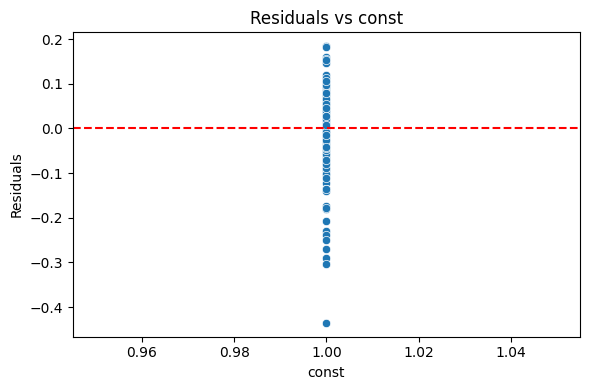

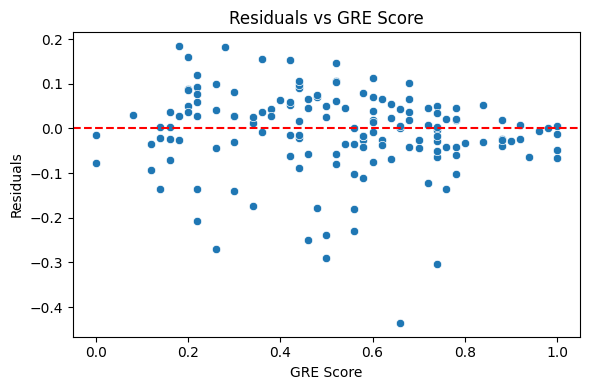

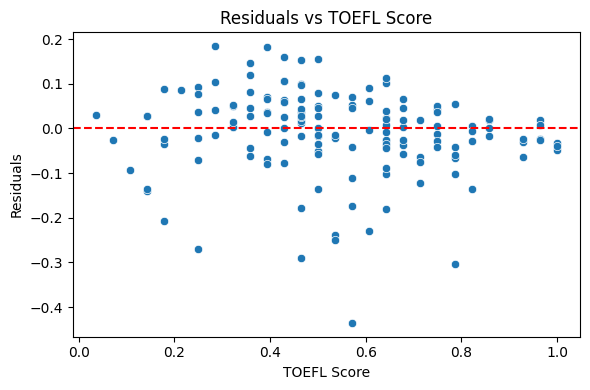

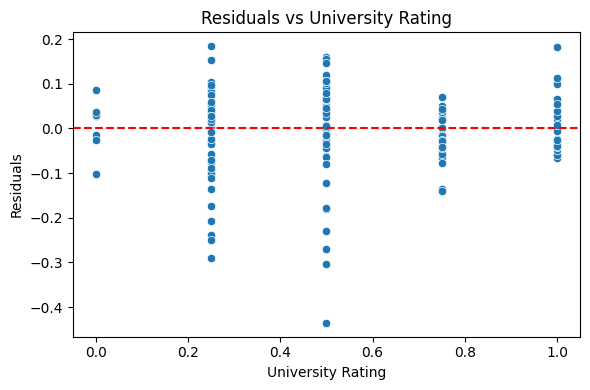

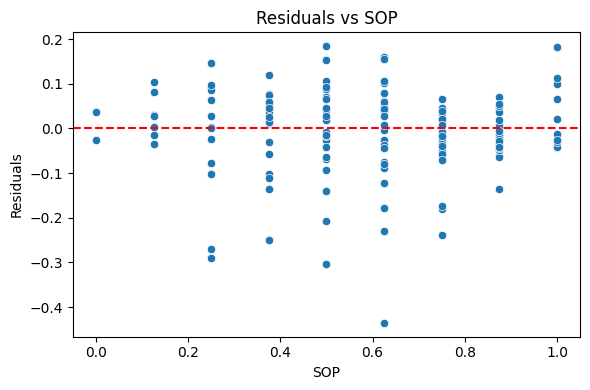

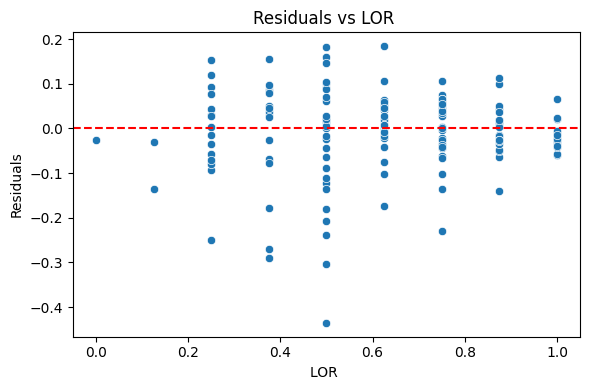

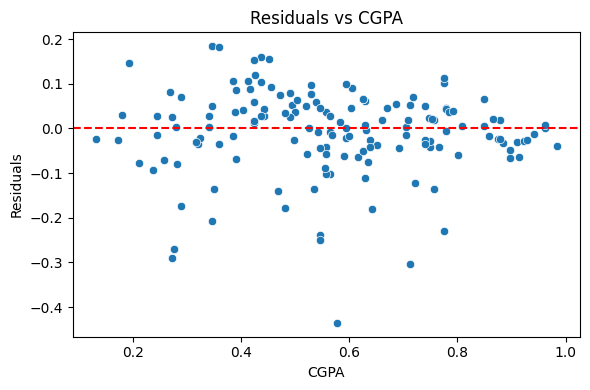

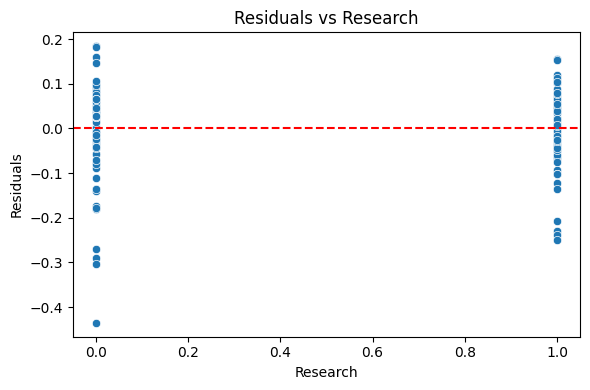

In [50]:
for col in X_test.columns:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(x=X_test[col], y=residuals)
    plt.axhline(y=0, color='red', linestyle='--')
    plt.xlabel(col)
    plt.ylabel("Residuals")
    plt.title(f"Residuals vs {col}")
    plt.tight_layout()
    plt.show()

- Residuals show a random scatter with no clear pattern or changing spread which means Homoscedasticity is there.

- **Normality of residuals** - In statistical models means the errors (the difference between observed and predicted values) are normally distributed around zero.

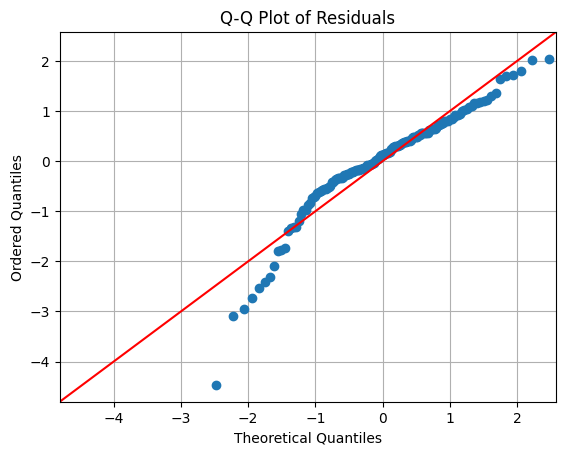

In [51]:
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Ordered Quantiles")
plt.grid(True)
plt.show()

- The Q-Q plot of residuals shows that most residuals are close to normally distributed, with only moderate deviations in the tails, indicating that the linearity assumption holds reasonably well for this dataset.

In [52]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1. Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. Fit models
models = {
    'Linear': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01)
}


def regression_metrics(y_true, y_pred, X):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    n = len(y_true)
    p = X.shape[1]
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    return mae, rmse, r2, adj_r2

# 3. Collect metrics for train and test
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Train metrics
    mae_tr, rmse_tr, r2_tr, adj_r2_tr = regression_metrics(y_train, y_train_pred, X_train_scaled)
    # Test metrics
    mae_te, rmse_te, r2_te, adj_r2_te = regression_metrics(y_test, y_test_pred, X_test_scaled)
    
    results.append({
        'Model': name,
        'Set': 'Train',
        'MAE': mae_tr,
        'RMSE': rmse_tr,
        'R2': r2_tr,
        'Adj_R2': adj_r2_tr
    })
    results.append({
        'Model': name,
        'Set': 'Test',
        'MAE': mae_te,
        'RMSE': rmse_te,
        'R2': r2_te,
        'Adj_R2': adj_r2_te
    })

# Create DataFrame
metrics_df = pd.DataFrame(results)

In [53]:
metrics_df

,Model,Set,MAE,RMSE,R2,Adj_R2
0,Linear,Train,0.067230,0.094395,0.818175,0.813910
1,Linear,Test,0.067736,0.095690,0.825631,0.815737
2,Ridge,Train,0.067199,0.094397,0.818170,0.813904
3,Ridge,Test,0.067771,0.095680,0.825666,0.815775
4,Lasso,Train,0.068046,0.095273,0.814777,0.810432
5,Lasso,Test,0.066751,0.096643,0.822140,0.812049


- The results show that all three models: Linear, Ridge and Lasso regression—perform very similarly on both the training and test sets. The MAE and RMSE values are nearly identical across models, indicating that regularization (Ridge and Lasso) does not substantially improve or worsen predictive accuracy compared to standard linear regression on this dataset. R2 and Adjusted R2 values are also very close, suggesting all models explain a similar proportion of the variance. There is no evidence of overfitting, as the metrics for train and test sets are consistent. 
Overall, the data suggests that the underlying relationships in dataset are well captured by linear modeling, and additional regularization provides minimal benefit in this case.

- The Q-Q plot of residuals shows that most residuals are close to normally distributed, with only moderate deviations in the tails, indicating that the linearity assumption holds reasonably well for your data. As a result, adding Ridge or Lasso regularization does not significantly change the model coefficients or improve generalization, leading to nearly identical error metrics for all models on both datasets. This consistency also suggests the absence of overfitting and that your features are not highly collinear or noisy, so all three approaches perform similarly.

### **Observation**

### **Observations**

#### **1. Data Understanding**

1. The dataset is complete, with no missing or duplicate values.
2. First column is a unique row identifier(**Serial No.**) and is dropped as it is not needed for modeling.
3. Target variable: **Chance of Admission** (continuous probability between 0 and 1). Chance of Admit mostly falls between 70% and 75%.
4. Independent variables: GRE, TOEFL, University Rating, SOP, LOR, CGPA, Research.
5. CGPA, GRE, and TOEFL are the top predictors of admission chances.



   * GRE: 290–340 (mostly 310–330)
   * TOEFL: 90–120 (mostly \~105)
   * CGPA: 6.8–9.92 (mostly \~8.5)

#### **2. Exploratory Data Analysis (EDA)**

6. GRE, TOEFL, CGPA are **normally distributed** with high means.
7. Chance of Admit is slightly **right-skewed**, but suitable for linear regression.
8. All variables show **negative kurtosis**, indicating flat distributions with fewer outliers.
9. SOP, LOR, and University Rating have **lower variance** and are on a **1–5 ordinal scale**.
10. Research is a **categorical** variable (0 or 1).
11. No significant outliers are present in any column.
12. No duplicate records exist in the dataset.

#### **3. Feature Engineering & Encoding**

13. University Rating, SOP, LOR, and Research are **ordinal/categorical** in nature.
14. These should be considered for **categorical encoding** instead of treating as continuous.
15. No data transformation is required as all distributions are reasonably normal.

#### **4. Correlation Analysis**

16. CGPA, GRE, and TOEFL show strong **positive correlation** with Chance of Admit.
17. University Rating, SOP, LOR, and Research have **weaker correlations**.
18. Several variables are highly intercorrelated, indicating potential **multicollinearity**.
19. All VIF values are < 5, so **no strong multicollinearity** is present.

#### **5. Model Selection and Assumption Testing**

20. Linear Regression is appropriate due to the continuous nature of the target.
21. Predictor variables meet linear regression assumptions: linearity, normality, homoscedasticity, and **mean residuals near zero**. (mean ≈ -0.0093).
22. Residual plots show **linearity and no major pattern**, validating the linear assumption.
23. **Homoscedasticity** is confirmed — variance of residuals is constant.
24. No transformation or polynomial terms are needed based on residual analysis.


#### **6. Model Building and Evaluation**

25. Models used: **Linear Regression**, **Ridge Regression**, **Lasso Regression**. Both Linear and Ridge Regression explain up to 82% of the variance in admission chances.
26. All models show **very similar train and test performance**, indicating good generalization.
27. **Ridge** performs slightly better across metrics (MAE, RMSE, R2, Adj. R2).
28. **Lasso** shows slightly lower performance but may be useful for **feature selection**.
29. **Linear Regression** provides competitive performance and is interpretable.
30. CGPA, GRE, and TOEFL consistently rank as top predictors across all models.

### **Actionable Insights & Recommendations**

**Significance of Predictor Variables**

- CGPA, GRE, and TOEFL are the most significant predictors of admission chances, consistently showing the highest correlation with the target variable and dominating model importance rankings.
- Research experience provides a moderate but meaningful boost to admission probability, highlighting the value placed on research exposure.
- SOP, LOR, and University Rating have lower variance and weaker correlation, suggesting they play a supporting role but may not strongly differentiate candidates in the current model.
- Multicollinearity is low (VIFs < 5), so all predictors contribute unique information, but periodic checks are recommended as data evolves.

---

**Recommendations:**
1. Continue to focus on CGPA, GRE, and TOEFL as primary drivers of admission predictions, as these variables are the most significant and reliable indicators of applicant success.
2. SOP, LOR, and University Rating have lower predictive power but still contribute, consider assigning contextual weights or thresholds (e.g., SOP > 3 only matters when CGPA is low).
3. Regularly audit and validate the model to identify and address any potential biases, ensuring fair and equitable admissions decisions, especially as new data sources are integrated.
4. Include variables like work experience, internships, project portfolios, or extracurriculars to enhance prediction and reduce over-reliance on academic scores.
5. The educational institute can not only support students in improving their GRE scores but also guide them in crafting strong Letters of Recommendation (LOR) and Statements of Purpose (SOP), thereby increasing their chances of admission to top-tier universities.
6. Increase admission yield and student success rate by improving model precision, institutions can admit candidates more likely to succeed, leading to higher retention, better academic performance, and stronger alumni outcomes.

## **END**